## Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

### The Company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Business Goal:

Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.


## Importing Python libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Reading & Understanding the Data

In [3]:
df=pd.read_csv("day.csv")

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Insights :

- The given dataset has 730 rowns and 16 columns.
- Except 'dteday' whose dtype is object (contains date type info), all other are either float or integer type.
- There seems to be no missing values from non-null value count. 
- Some columns that are categorical in nature, but in integer/float type.
- TARGET variable/column is 'cnt'

## Cleaning Data

### Dropping irrevelent Columns

- instant is just a row instance identifier.
- dteday is removed as we have some of date features like mnth and year and weekday already in other columns
- casual and registered variables are not available at the time of prediction and also these describe the target variable cnt in a very trivial way target = casual + registered, which leads to data leakage.

In [8]:
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [10]:
# Renaming some columns for better understanding

df = df.rename(columns={'yr':'year','mnth':'month','weathersit':'weather','hum':'humidity','cnt':'count'})

In [11]:
df.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


##  Visualising the Data 

### Encoding the label's & Visualising Categorical Variables

#### 1) Season

In [12]:
df['season']=df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

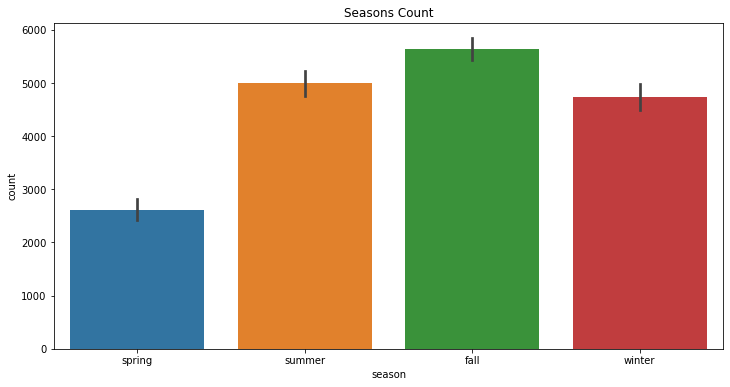

In [13]:
plt.figure(figsize=[12,6])
sns.barplot(df['season'],df['count'])
plt.title('Seasons Count')
plt.show()

#### 2) Month

In [14]:
df['month']=df['month'].map({1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

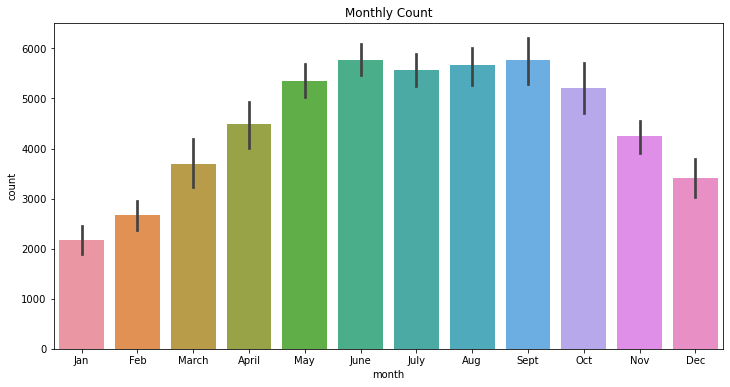

In [15]:
plt.figure(figsize=[12,6])
sns.barplot(df['month'],df['count'])
plt.title('Monthly Count')
plt.show()

#### 3) Weekday

In [16]:
df['weekday']=df['weekday'].map({0:'Sun',1:'Mon',2:'Tues',3:'Wed',4:'Thru',5:'Fri',6:'Sat'})

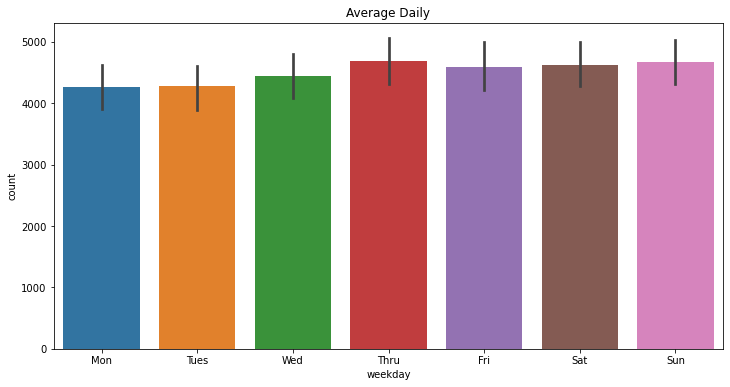

In [17]:
plt.figure(figsize=[12,6])
sns.barplot(df['weekday'],df['count'])
plt.title('Average Daily')
plt.show()

#### 4) Weather

In [18]:
df['weather']=df['weather'].map({1:"Good/Clear",2:'Moderate/Misty',3:'Bad/LightRain',4:'Worse/HeavyRain'})

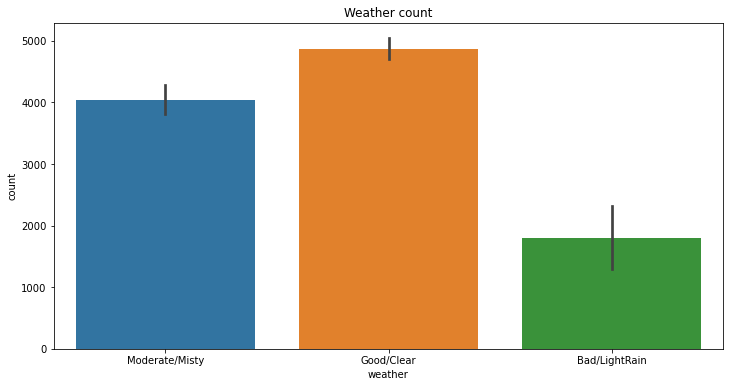

In [19]:
plt.figure(figsize=[12,6])
sns.barplot(df['weather'],df['count'])
plt.title('Weather count')
plt.show()

#### 5) Year

In [20]:
df['year']=df['year'].map({0:'2018',1:'2019'})

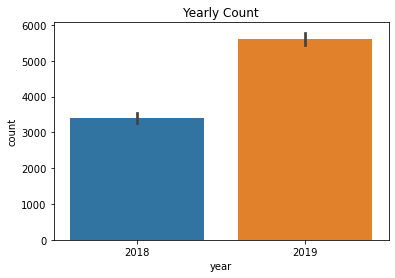

In [21]:
sns.barplot(df['year'],df['count'])
plt.title('Yearly Count')
plt.show()

#### 6) Holiday

In [22]:
df['holiday']=df['holiday'].map({0:'No',1:'Yes'})

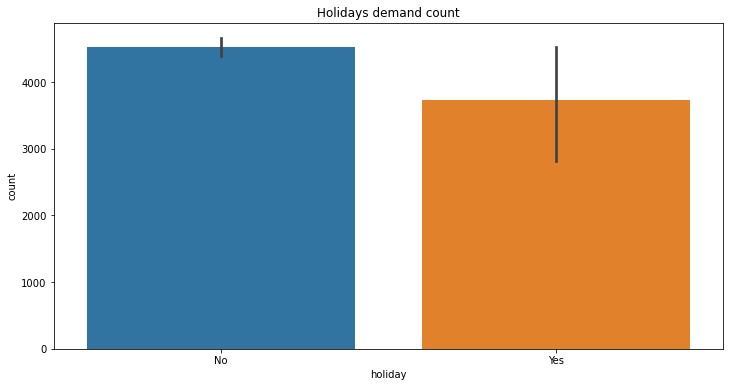

In [23]:
plt.figure(figsize=[12,6])
sns.barplot(df['holiday'],df['count'])
plt.title('Holidays demand count')
plt.show()

#### 7) Working day

In [24]:
df['workingday']=df['workingday'].map({0:'No',1:'Yes'})

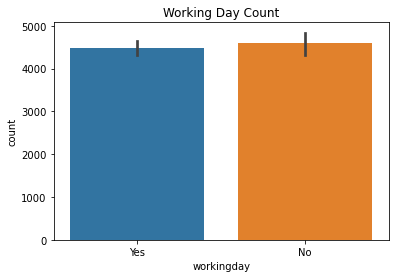

In [25]:
sns.barplot(df['workingday'],df['count'])

plt.title('Working Day Count')
plt.show()

### Insights:

1) season: Most of the bike booking were happening during fall and summer season with a median of over 5000 booking. This indicates, season can be a good predictor for the dependent variable.

2) month: Most bike booking were happening in the months 5,6,7,8,9 & 10 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

3) weekday: weekday variable shows very close trend having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor.

4) weather: Most of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking followed by weathersit2 with median above 4000 .This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

5) year: 2019 is clearly a better year the bike booking. This indicates it could be useful.

6) holiday: Most of the bike booking were happening when it is not a holiday. This indicates, holiday can't be a good predictor for the dependent variable for increasing bookings.

7) workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable



In [26]:
df

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,spring,2018,Jan,No,Mon,Yes,Moderate/Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No,Tues,Yes,Moderate/Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No,Wed,Yes,Good/Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No,Thru,Yes,Good/Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No,Fri,Yes,Good/Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,Dec,No,Fri,Yes,Moderate/Misty,10.420847,11.33210,65.2917,23.458911,2114
726,spring,2019,Dec,No,Sat,No,Moderate/Misty,10.386653,12.75230,59.0000,10.416557,3095
727,spring,2019,Dec,No,Sun,No,Moderate/Misty,10.386653,12.12000,75.2917,8.333661,1341
728,spring,2019,Dec,No,Mon,Yes,Good/Clear,10.489153,11.58500,48.3333,23.500518,1796


### Visualizing the Relationship among numeric variables
Let's make a pairplot of all the numeric variables

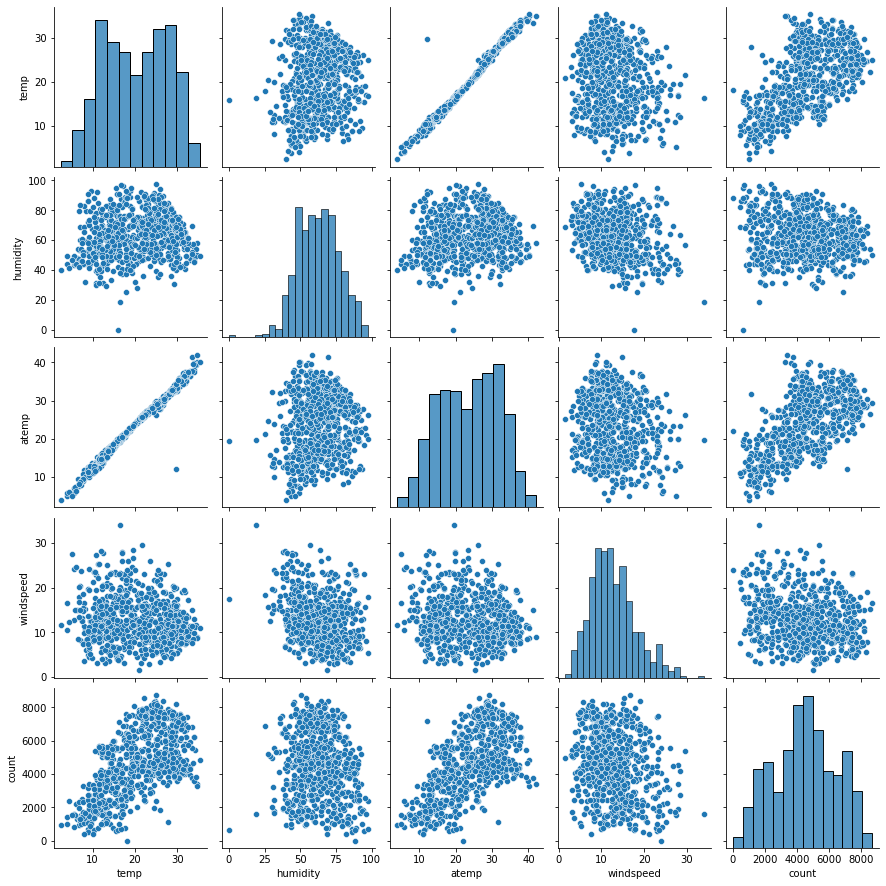

In [27]:
sns.pairplot(df, vars=['temp','humidity','atemp','windspeed',"count"])
plt.show()

### Insights:
    - There is linear relationship between temp and atemp.
    - There is some positive linear trend between temp-cnt and atemp-cnt

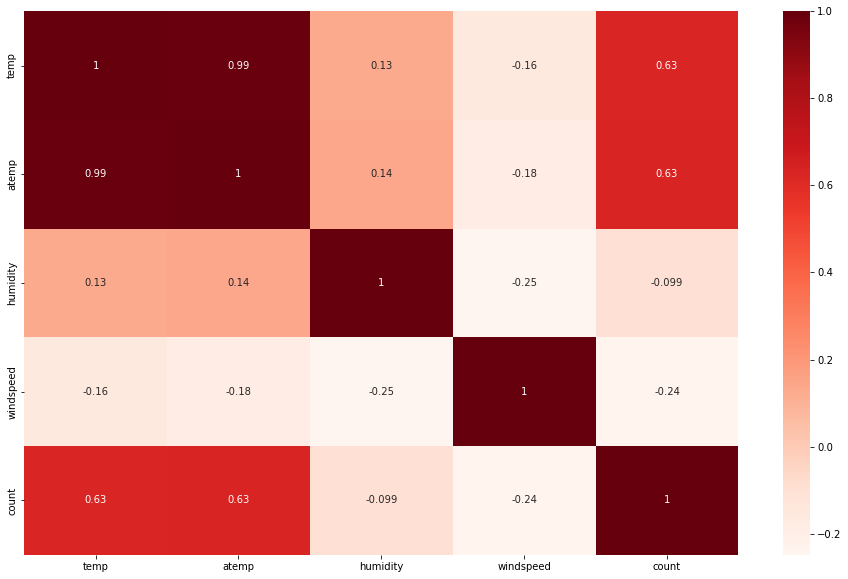

In [28]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True,cmap="Reds")
plt.show()

### Insights:
    - There is a correlation of 0.63 between cnt-temp and cnt-atemp
    - There is a correlation of 0.99 between temp and atemp

## Data Preparation

In [29]:
x =['season','month','weekday','weather','year','holiday','workingday']
for i in x:
    df[i]=df[i].astype('category')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    category
 2   month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weather     730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  count       730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [31]:
df_1 = df[['season','month','weekday','weather','year','holiday','workingday']]

In [32]:
dummy=pd.get_dummies(df_1,drop_first=True)

In [33]:
dummy

,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,month_March,...,weekday_Sat,weekday_Sun,weekday_Thru,weekday_Tues,weekday_Wed,weather_Good/Clear,weather_Moderate/Misty,year_2019,holiday_Yes,workingday_Yes
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
726,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
727,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [34]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   season_spring           730 non-null    uint8
 1   season_summer           730 non-null    uint8
 2   season_winter           730 non-null    uint8
 3   month_Aug               730 non-null    uint8
 4   month_Dec               730 non-null    uint8
 5   month_Feb               730 non-null    uint8
 6   month_Jan               730 non-null    uint8
 7   month_July              730 non-null    uint8
 8   month_June              730 non-null    uint8
 9   month_March             730 non-null    uint8
 10  month_May               730 non-null    uint8
 11  month_Nov               730 non-null    uint8
 12  month_Oct               730 non-null    uint8
 13  month_Sept              730 non-null    uint8
 14  weekday_Mon             730 non-null    uint8
 15  weekday_Sat            

In [35]:
dff=pd.concat([df,dummy],axis=1)

In [36]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   season                  730 non-null    category
 1   year                    730 non-null    category
 2   month                   730 non-null    category
 3   holiday                 730 non-null    category
 4   weekday                 730 non-null    category
 5   workingday              730 non-null    category
 6   weather                 730 non-null    category
 7   temp                    730 non-null    float64 
 8   atemp                   730 non-null    float64 
 9   humidity                730 non-null    float64 
 10  windspeed               730 non-null    float64 
 11  count                   730 non-null    int64   
 12  season_spring           730 non-null    uint8   
 13  season_summer           730 non-null    uint8   
 14  season_winter           73

In [37]:
dff.drop(df_1, axis=1, inplace = True)

In [38]:
dff.shape

(730, 30)

In [39]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temp                    730 non-null    float64
 1   atemp                   730 non-null    float64
 2   humidity                730 non-null    float64
 3   windspeed               730 non-null    float64
 4   count                   730 non-null    int64  
 5   season_spring           730 non-null    uint8  
 6   season_summer           730 non-null    uint8  
 7   season_winter           730 non-null    uint8  
 8   month_Aug               730 non-null    uint8  
 9   month_Dec               730 non-null    uint8  
 10  month_Feb               730 non-null    uint8  
 11  month_Jan               730 non-null    uint8  
 12  month_July              730 non-null    uint8  
 13  month_June              730 non-null    uint8  
 14  month_March             730 non-null    ui

## Splitting the Data into Training and Testing Sets

In [40]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(dff, train_size = 0.7, test_size = 0.3, random_state = 100)

In [41]:
print(df_train.shape)
print(df_test.shape)
#it shows data is correctly splitted in 70-30

(510, 30)
(219, 30)


### Rescaling the Features

In [42]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [43]:
num_vars = [ 'temp', 'atemp', 'humidity','windspeed', 'count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,...,weekday_Sat,weekday_Sun,weekday_Thru,weekday_Tues,weekday_Wed,weather_Good/Clear,weather_Moderate/Misty,year_2019,holiday_Yes,workingday_Yes
653,-0.121335,-0.055878,-0.514725,-0.117752,1.562685,0,0,1,0,0,...,0,0,0,0,1,1,0,1,0,1
576,1.231731,1.194106,0.516433,-0.330615,1.399629,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,1
426,-0.420478,-0.348834,-0.069854,-0.385694,-0.215554,1,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
728,-1.294913,-1.473492,-1.045032,2.018143,-1.379511,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
482,-0.627580,-0.571474,-1.000840,-0.779889,-0.136589,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [44]:
df_train.describe()

,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,...,weekday_Sat,weekday_Sun,weekday_Thru,weekday_Tues,weekday_Wed,weather_Good/Clear,weather_Moderate/Misty,year_2019,holiday_Yes,workingday_Yes
count,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,-2.757054e-16,4.193813e-16,-3.459107e-16,-2.333645e-16,-5.398732e-17,0.243137,0.245098,0.24902,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.627451,0.343137,0.507843,0.025490,0.711765
std,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,1.000982e+00,0.429398,0.430568,0.43287,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.483958,0.475223,0.500429,0.157763,0.453386
min,-2.381246e+00,-2.417741e+00,-4.462565e+00,-1.890981e+00,-2.289141e+00,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.749555e-01,-8.526058e-01,-7.666192e-01,-7.167878e-01,-7.006213e-01,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.443562e-02,6.514277e-02,2.294988e-02,-1.415145e-01,2.236523e-02,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,8.773604e-01,8.269866e-01,7.167702e-01,5.522525e-01,7.625291e-01,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,2.050938e+00,2.295305e+00,2.399023e+00,4.004188e+00,2.167738e+00,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


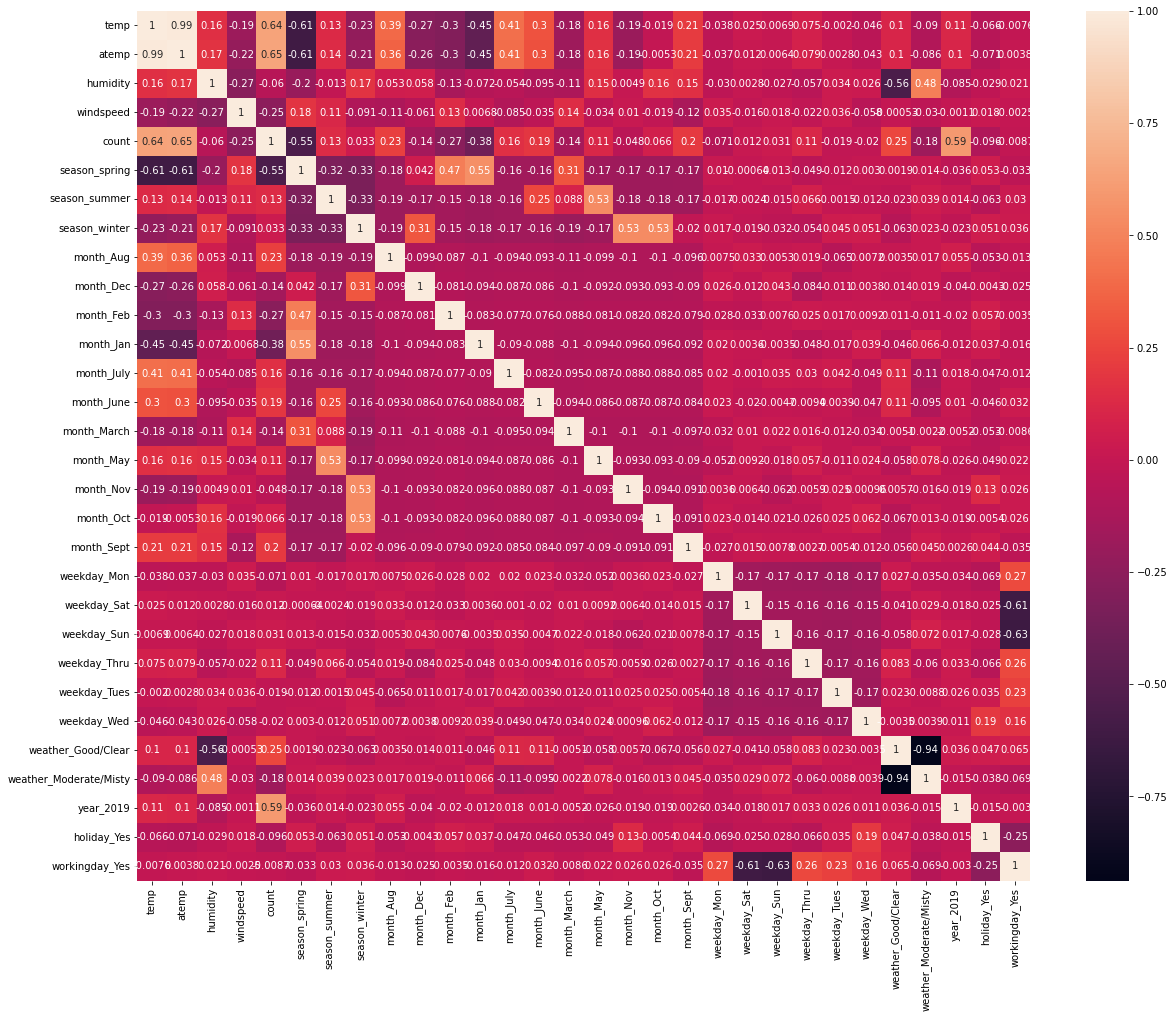

In [45]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 16))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

### Dividing into X and Y sets for the model building

In [46]:
y_train = df_train.pop('count')
X_train = df_train

In [47]:
X_train.shape

(510, 29)

In [48]:
y_train.shape

(510,)

Using Recursive feature elimination(RFE) for automated Feature Selection approach

In [49]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [50]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 11),
 ('humidity', False, 6),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_Aug', False, 9),
 ('month_Dec', True, 1),
 ('month_Feb', True, 1),
 ('month_Jan', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 14),
 ('month_March', False, 15),
 ('month_May', False, 5),
 ('month_Nov', True, 1),
 ('month_Oct', False, 12),
 ('month_Sept', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 3),
 ('weekday_Sun', False, 4),
 ('weekday_Thru', False, 13),
 ('weekday_Tues', False, 7),
 ('weekday_Wed', False, 10),
 ('weather_Good/Clear', True, 1),
 ('weather_Moderate/Misty', True, 1),
 ('year_2019', True, 1),
 ('holiday_Yes', True, 1),
 ('workingday_Yes', False, 2)]

In [52]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'month_Dec', 'month_Feb', 'month_Jan', 'month_July', 'month_Nov',
       'month_Sept', 'weather_Good/Clear', 'weather_Moderate/Misty',
       'year_2019', 'holiday_Yes'],
      dtype='object')

In [53]:
X_train.columns[~rfe.support_]

Index(['atemp', 'humidity', 'month_Aug', 'month_June', 'month_March',
       'month_May', 'month_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thru', 'weekday_Tues', 'weekday_Wed', 'workingday_Yes'],
      dtype='object')

In [54]:
# forming new data frame with selected feature
X_train_rfe = X_train[col]

##  Building a linear model

### Model 1

In [55]:
import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.0
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          4.55e-186
Time:                        20:19:22   Log-Likelihood:                -254.93
No. Observations:                 510   AIC:                             541.9
Df Residuals:                     494   BIC:                             609.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.6593      0.122    -13.629      0.000      -1.899      -1.420
temp                       0.4232      0.038     11.263      0.000       0.349       0.497
windspeed                 -0.1212      0.019     -6.368      0.000      -0.159      -0.084
season_spring             -0.2707      0.099     -2.726      0.007      -0.466      -0.076
season_summer              0.1326      0.069      1.910      0.057      -0.004       0.269
season_winter              0.3873      0.080      4.857      0.000       0.231       0.544
month_Dec                 -0.2429      0.082     -2.946      0.003      -0.405      -0.081
month_Feb                 -0.1744      0.098     -1.779      0.076      -0.367       0.018
month_Jan                 -0.3170      0.097     -3.270      0.001      -0.508      -0.127
month_July                -0.2200      0.082     -2.675      0.008      -0.382      -0.058
month_Nov                 -0.2099      0.086     -2.449      0.015      -0.378      -0.042
month_Sept                 0.2971      0.076      3.905      0.000       0.148       0.447
weather_Good/Clear         1.3094      0.109     11.968      0.000       1.094       1.524
weather_Moderate/Misty     0.9466      0.111      8.520      0.000       0.728       1.165
year_2019                  1.0457      0.036     28.805      0.000       0.974       1.117
holiday_Yes               -0.3976      0.116     -3.431      0.001      -0.625      -0.170
==============================================================================
Omnibus:                       74.865   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.592
Skew:                          -0.745   Prob(JB):                     6.77e-42
Kurtosis:                       5.589   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dropping month_Feb due to high p-value ie greater than 5%

### Model 2

In [56]:
X_train_new = X_train_rfe.drop(['month_Feb'], axis=1)

In [57]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.57e-186
Time:                        20:19:22   Log-Likelihood:                -256.56
No. Observations:                 510   AIC:                             543.1
Df Residuals:                     495   BIC:                             606.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.6741      0.122    -13.752      0.000      -1.913      -1.435
temp                       0.4401      0.036     12.083      0.000       0.369       0.512
windspeed                 -0.1199      0.019     -6.290      0.000      -0.157      -0.082
season_spring             -0.3193      0.096     -3.337      0.001      -0.507      -0.131
season_summer              0.1483      0.069      2.148      0.032       0.013       0.284
season_winter              0.3951      0.080      4.951      0.000       0.238       0.552
month_Dec                 -0.1985      0.079     -2.520      0.012      -0.353      -0.044
month_Jan                 -0.2240      0.082     -2.738      0.006      -0.385      -0.063
month_July                -0.2245      0.082     -2.725      0.007      -0.386      -0.063
month_Nov                 -0.1865      0.085     -2.198      0.028      -0.353      -0.020
month_Sept                 0.3040      0.076      3.992      0.000       0.154       0.454
weather_Good/Clear         1.3054      0.110     11.908      0.000       1.090       1.521
weather_Moderate/Misty     0.9424      0.111      8.466      0.000       0.724       1.161
year_2019                  1.0442      0.036     28.709      0.000       0.973       1.116
holiday_Yes               -0.4097      0.116     -3.533      0.000      -0.637      -0.182
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-square is good and pvalue is under 5% so lets check VIF to check effect of variables on each other

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.81
11,weather_Good/Clear,8.68
12,weather_Moderate/Misty,8.63
3,season_spring,5.21
1,temp,4.10
5,season_winter,3.68
4,season_summer,2.73
9,month_Nov,1.75
7,month_Jan,1.67
6,month_Dec,1.48


Dropping 'const' due to high VIF

### Model 3

In [59]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [60]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.57e-186
Time:                        20:19:22   Log-Likelihood:                -256.56
No. Observations:                 510   AIC:                             543.1
Df Residuals:                     495   BIC:                             606.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.6741      0.122    -13.752      0.000      -1.913      -1.435
temp                       0.4401      0.036     12.083      0.000       0.369       0.512
windspeed                 -0.1199      0.019     -6.290      0.000      -0.157      -0.082
season_spring             -0.3193      0.096     -3.337      0.001      -0.507      -0.131
season_summer              0.1483      0.069      2.148      0.032       0.013       0.284
season_winter              0.3951      0.080      4.951      0.000       0.238       0.552
month_Dec                 -0.1985      0.079     -2.520      0.012      -0.353      -0.044
month_Jan                 -0.2240      0.082     -2.738      0.006      -0.385      -0.063
month_July                -0.2245      0.082     -2.725      0.007      -0.386      -0.063
month_Nov                 -0.1865      0.085     -2.198      0.028      -0.353      -0.020
month_Sept                 0.3040      0.076      3.992      0.000       0.154       0.454
weather_Good/Clear         1.3054      0.110     11.908      0.000       1.090       1.521
weather_Moderate/Misty     0.9424      0.111      8.466      0.000       0.724       1.161
year_2019                  1.0442      0.036     28.709      0.000       0.973       1.116
holiday_Yes               -0.4097      0.116     -3.533      0.000      -0.637      -0.182
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-square is good and pvalue is under 5% so lets check VIF to check effect of variables on each other

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,weather_Good/Clear,6.94
2,season_spring,5.82
11,weather_Moderate/Misty,4.18
4,season_winter,3.99
0,temp,3.83
3,season_summer,3.04
12,year_2019,2.06
8,month_Nov,1.92
6,month_Jan,1.82
5,month_Dec,1.61


Dropping 'weather_Good/Clear' due to high VIF

### Model 4

In [62]:
X_train_new = X_train_new.drop(['weather_Good/Clear'], axis=1)

In [63]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.1
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.08e-160
Time:                        20:19:23   Log-Likelihood:                -320.80
No. Observations:                 510   AIC:                             669.6
Df Residuals:                     496   BIC:                             728.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.4591      0.075     -6.102      0.000      -0.607      -0.311
temp                       0.4690      0.041     11.389      0.000       0.388       0.550
windspeed                 -0.1408      0.022     -6.546      0.000      -0.183      -0.099
season_spring             -0.2713      0.108     -2.505      0.013      -0.484      -0.059
season_summer              0.1793      0.078      2.294      0.022       0.026       0.333
season_winter              0.3335      0.090      3.696      0.000       0.156       0.511
month_Dec                 -0.1230      0.089     -1.383      0.167      -0.298       0.052
month_Jan                 -0.1811      0.093     -1.956      0.051      -0.363       0.001
month_July                -0.2379      0.093     -2.549      0.011      -0.421      -0.055
month_Nov                 -0.1107      0.096     -1.154      0.249      -0.299       0.078
month_Sept                 0.2750      0.086      3.189      0.002       0.106       0.444
weather_Moderate/Misty    -0.3017      0.044     -6.926      0.000      -0.387      -0.216
year_2019                  1.0687      0.041     25.974      0.000       0.988       1.150
holiday_Yes               -0.3590      0.131     -2.734      0.006      -0.617      -0.101
==============================================================================
Omnibus:                      146.814   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.237
Skew:                          -1.261   Prob(JB):                    9.07e-125
Kurtosis:                       7.530   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dropping month_Nov due to high p-value ie greater than 5%

### Model 5

In [64]:
X_train_new = X_train_new.drop(['month_Nov'], axis=1)

In [65]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     159.1
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.63e-161
Time:                        20:19:24   Log-Likelihood:                -321.48
No. Observations:                 510   AIC:                             669.0
Df Residuals:                     497   BIC:                             724.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.4771      0.074     -6.478      0.000      -0.622      -0.332
temp                       0.4811      0.040     12.078      0.000       0.403       0.559
windspeed                 -0.1410      0.022     -6.555      0.000      -0.183      -0.099
season_spring             -0.2489      0.107     -2.335      0.020      -0.458      -0.039
season_summer              0.1945      0.077      2.523      0.012       0.043       0.346
season_winter              0.3079      0.087      3.519      0.000       0.136       0.480
month_Dec                 -0.0830      0.082     -1.013      0.312      -0.244       0.078
month_Jan                 -0.1678      0.092     -1.825      0.069      -0.348       0.013
month_July                -0.2374      0.093     -2.543      0.011      -0.421      -0.054
month_Sept                 0.2905      0.085      3.409      0.001       0.123       0.458
weather_Moderate/Misty    -0.3002      0.044     -6.893      0.000      -0.386      -0.215
year_2019                  1.0682      0.041     25.954      0.000       0.987       1.149
holiday_Yes               -0.3777      0.130     -2.898      0.004      -0.634      -0.122
==============================================================================
Omnibus:                      139.682   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              514.521
Skew:                          -1.215   Prob(JB):                    1.88e-112
Kurtosis:                       7.279   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dropping month_Dec due to high p-value ie greater than 5%

### Model 6

In [66]:
X_train_new = X_train_new.drop(['month_Dec'], axis=1)

In [67]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     173.5
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          2.01e-162
Time:                        20:19:24   Log-Likelihood:                -322.00
No. Observations:                 510   AIC:                             668.0
Df Residuals:                     498   BIC:                             718.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.4883      0.073     -6.706      0.000      -0.631      -0.345
temp                       0.4903      0.039     12.644      0.000       0.414       0.566
windspeed                 -0.1387      0.021     -6.484      0.000      -0.181      -0.097
season_spring             -0.2446      0.107     -2.297      0.022      -0.454      -0.035
season_summer              0.2033      0.077      2.654      0.008       0.053       0.354
season_winter              0.3031      0.087      3.469      0.001       0.131       0.475
month_Jan                 -0.1477      0.090     -1.645      0.101      -0.324       0.029
month_July                -0.2388      0.093     -2.557      0.011      -0.422      -0.055
month_Sept                 0.2972      0.085      3.498      0.001       0.130       0.464
weather_Moderate/Misty    -0.3005      0.044     -6.899      0.000      -0.386      -0.215
year_2019                  1.0682      0.041     25.953      0.000       0.987       1.149
holiday_Yes               -0.3739      0.130     -2.869      0.004      -0.630      -0.118
==============================================================================
Omnibus:                      137.324   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              497.840
Skew:                          -1.199   Prob(JB):                    7.86e-109
Kurtosis:                       7.205   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dropping month_Jan due to high p-value ie greater than 5%

### Model 7

In [68]:
X_train_new = X_train_new.drop(['month_Jan'], axis=1)

In [69]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     189.9
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          5.44e-163
Time:                        20:19:24   Log-Likelihood:                -323.39
No. Observations:                 510   AIC:                             668.8
Df Residuals:                     499   BIC:                             715.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.5018      0.072     -6.924      0.000      -0.644      -0.359
temp                       0.5067      0.038     13.497      0.000       0.433       0.580
windspeed                 -0.1340      0.021     -6.311      0.000      -0.176      -0.092
season_spring             -0.2659      0.106     -2.511      0.012      -0.474      -0.058
season_summer              0.2152      0.076      2.817      0.005       0.065       0.365
season_winter              0.3267      0.086      3.785      0.000       0.157       0.496
month_July                -0.2453      0.093     -2.625      0.009      -0.429      -0.062
month_Sept                 0.2991      0.085      3.515      0.000       0.132       0.466
weather_Moderate/Misty    -0.3041      0.044     -6.980      0.000      -0.390      -0.219
year_2019                  1.0653      0.041     25.862      0.000       0.984       1.146
holiday_Yes               -0.3768      0.131     -2.887      0.004      -0.633      -0.120
==============================================================================
Omnibus:                      137.062   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              497.223
Skew:                          -1.196   Prob(JB):                    1.07e-108
Kurtosis:                       7.204   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-square is good and p-value is under 5% so lets check VIF to check effect of variables on each other

In [70]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,2.44
2,season_spring,2.29
8,year_2019,1.93
4,season_winter,1.59
7,weather_Moderate/Misty,1.49
3,season_summer,1.37
5,month_July,1.36
6,month_Sept,1.18
1,windspeed,1.08
9,holiday_Yes,1.04


So now Rsquare is 79.2% which is a good number,p values are within limit and VIF is less than 5. This is our final model.

### Insights:
- The Model 7 looks pretty decent with p-values significant and very low multicollinearity between the predictor variables.
- The R-squared and Adj. R-squared looks very good at 0.792 and 0.788 respectively.
- F-static is also large, stating a good fit of model.
- We will check the test data metrics to check whether this model is significant enough or not.

### Result
const = -0.5018, temp = 0.5067, windspeed = -0.1340, season_spring = -0.2659, season_summer = 0.2152, season_winter = 0.3267, month_July = -0.2453, month_Sept = 0.2991, weather_Moderate/Misty = -0.3041, year_2019 = 1.0653, holiday_Yes = -0.3768

### Residual Analysis of the train data

Error terms are normally distributed with mean zero.

In [71]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

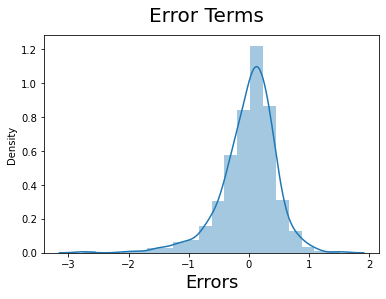

In [72]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

### Insights:

From the plot, we could see that residuals are normally distributed and hence, our assumption for linear regression is valid

### Making Predictions Using the Final Model

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model

In [73]:
num_vars = ['temp', 'atemp', 'humidity','windspeed', 'count']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [74]:
y_test = df_test.pop('count')
X_test = df_test

In [75]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [76]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Prediction

Text(0, 0.5, 'y_pred')

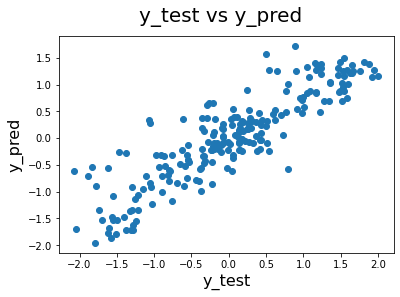

In [77]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=16)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

- thus same linearity is present in test data,its good

- best fitted line equation

Text(0.5, 0, 'Index')

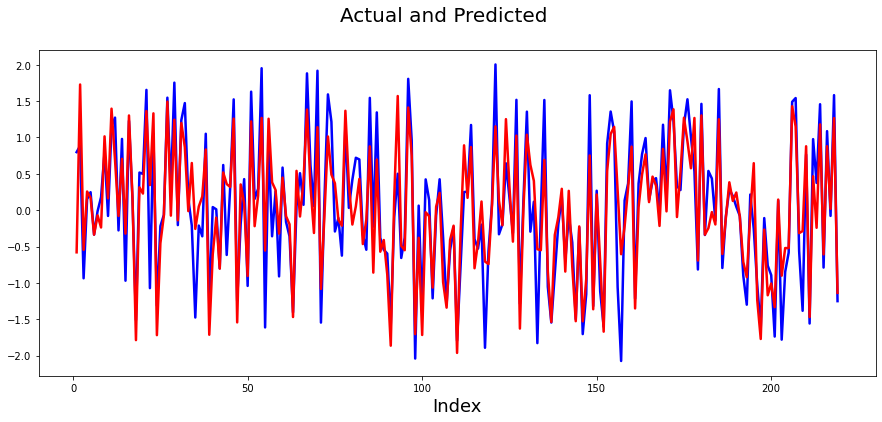

In [78]:
# Actual vs Predicted 
c = [i for i in range(1,220,1)]         # generating index  
fig = plt.figure(figsize=(15,6)) 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") 
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") 
fig.suptitle('Actual and Predicted', fontsize=20) 
plt.xlabel('Index', fontsize=18)   

### R-Squared value Test

In [79]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

print('Test r^2 :',round((r2_test*100),2))
print('Train r^2 :',round((r2_train*100),2))

Test r^2 : 77.79
Train r^2 : 79.19


### Adjusted R-Squared value Test

In [80]:
n = X_test.shape[0]
n1 = X_train_new.shape[0]

p = X_test.shape[1]
p1 = X_train_new.shape[1]



adjustedr2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjustedr2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test adjusted r^2 :',round((adjustedr2_test*100),2))
print('Train adjusted r^2 :',round((adjustedr2_train*100),2))

Test adjusted r^2 : 74.38
Train adjusted r^2 : 78.77


### Final model equation

count = -0.5018 + temp * 0.5067 + windspeed * -0.1340 + season_spring * -0.2659 + season_summer * 0.2152 + 
season_winter * 0.3267 + month_July * -0.2453 + month_Sept * 0.2991 + weather_Moderate/Misty * -0.3041 + year_2019 * 1.0653 + 
holiday_Yes * -0.3768